# The Sparks Foundation : DATA SCIENCE AND BUSINESS ANALYTICS

## Task 1: Prediction Using Supervised ML 

### Predict the percentage of student based on no. of hours studied

##### Dataset used : https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [1]:
import pandas as pd   # for constructing dataframe
import seaborn as sns # for plotting
import requests # for webscrapping
import matplotlib.pyplot as plt # for plotting graphs

__Reading the data from url csv file to data frame__

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)

In [3]:
df.head() # displaying top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


__To check if data contains any null values__

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Our data has no null value

__Getting the correlation among the features__ 

In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

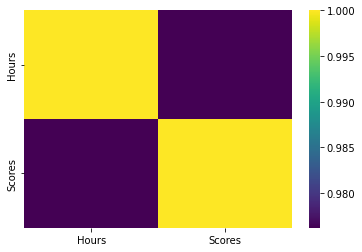

In [6]:
sns.heatmap(df.corr(),cmap='viridis')

__Conclusion__: We can see that there is a high correlation of 0.97 between no. of hours studied and total score 

### Now we will plot the data to see the pattern it makes

Text(0.5, 1.0, 'Hours vs Percentage')

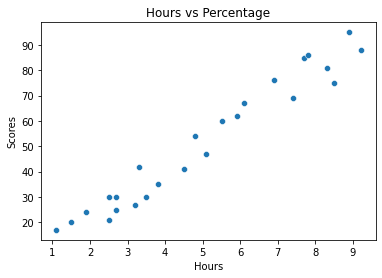

In [7]:
sns.scatterplot(x=df.Hours,y=df.Scores)
plt.title("Hours vs Percentage")

__We can see a strong linear relationship between the two features forming a straight line when plotted__

Now we will separate the data into dependent(score) feature(output) and independent(no. of hours studied) feature.

In [8]:
x=df.iloc[:,0:1].values # independent feature(hours studied)
y=df.iloc[:,1].values   # dependent feature(percentage)

__Splitting the data into training and test sets__

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

__Training the model__

In [10]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(x_train,y_train)
print("Model Trained")

Model Trained


__Plotting the fitted regression line obtained__

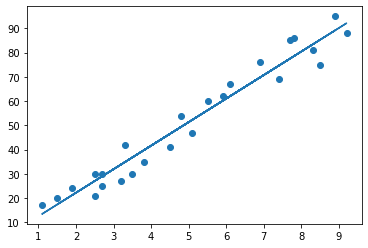

In [11]:
line=Lr.coef_*x+Lr.intercept_  # regression line
plt.scatter(x,y)
plt.plot(x,line)

__Making prediction on test data using the above model__

In [12]:
yhat=Lr.predict(x_test)
df1=pd.DataFrame({'Actual':y_test,'Predicted':yhat})
df1 # comparison between actual and obtained values

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


__Calculating the model accuracy__

In [13]:
from sklearn.metrics import r2_score
print("Accuracy score of the model is: ",r2_score(y_test,yhat))

Accuracy score of the model is:  0.9487647340257012


### Conclusion: We got a high accuracy of 0.94 suggesting that our model has performed well on test data and now can be used to make further predictions on new data